In [382]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
limiter=3000
data_path = "/Users/patrycjapiechowicz/Downloads/sample_data_6k (1).jsonl"
import scipy.stats as stats
from scipy.stats import chi2_contingency
with open(data_path) as file:
  data = [json.loads(next(file)) for x in range(limiter)]

In [383]:
df=pd.DataFrame(data)

In [384]:
df.sample(1)

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
1638,6a71aa0478787fd7ec4e2e259f976b9b135fa07b8f9ebd...,c1b978bca5679fb8ee2bc82269ef6315,2018-01,0,,"[91217, 9634, 3744, 4906, 4642, 1999, 4934, 30...","[38911, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 2064, 'avlength': 18.6017441860...","{'size': 524288, 'vsize': 40960, 'has_debug': ...","{'coff': {'timestamp': 1062580173, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['GetModuleHandleA', 'GetStar...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."


In [385]:
df.shape

(3000, 14)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sha256           3000 non-null   object
 1   md5              3000 non-null   object
 2   appeared         3000 non-null   object
 3   label            3000 non-null   int64 
 4   avclass          3000 non-null   object
 5   histogram        3000 non-null   object
 6   byteentropy      3000 non-null   object
 7   strings          3000 non-null   object
 8   general          3000 non-null   object
 9   header           3000 non-null   object
 10  section          3000 non-null   object
 11  imports          3000 non-null   object
 12  exports          3000 non-null   object
 13  datadirectories  3000 non-null   object
dtypes: int64(1), object(13)
memory usage: 328.2+ KB


In [387]:
df.isnull().sum() #Missing values

sha256             0
md5                0
appeared           0
label              0
avclass            0
histogram          0
byteentropy        0
strings            0
general            0
header             0
section            0
imports            0
exports            0
datadirectories    0
dtype: int64

In [388]:
df.isna().sum() #Missing values

sha256             0
md5                0
appeared           0
label              0
avclass            0
histogram          0
byteentropy        0
strings            0
general            0
header             0
section            0
imports            0
exports            0
datadirectories    0
dtype: int64

Let's explore deeper some of the features:

Label:   1- malicious PE file, 0- benaign PE file, -1 - unlabeled PE file - not taken into account in this EDA.
General - general information about a PE file, in details described below.
String - list of nested attributes about string, in details described below.



**1.LABEL**

In [389]:
#1. To check the balance of dataset
df.groupby('label').size()

label
-1     518
 0    1719
 1     763
dtype: int64

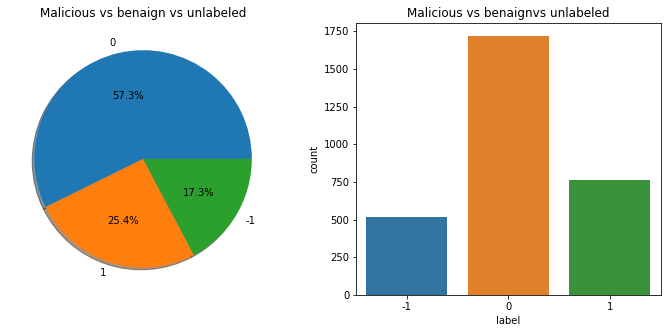

In [390]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Malicious vs benaign vs unlabeled')
ax[0].set_ylabel('')
sns.countplot('label',data=df,ax=ax[1])
ax[1].set_title('Malicious vs benaignvs unlabeled')
plt.show()

In [391]:
df_labeled = df[df['label'] != -1]  

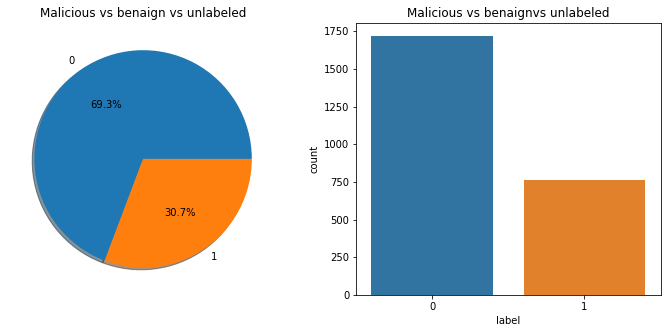

In [392]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df_labeled['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Malicious vs benaign vs unlabeled')
ax[0].set_ylabel('')
sns.countplot('label',data=df_labeled,ax=ax[1])
ax[1].set_title('Malicious vs benaignvs unlabeled')
plt.show()

In [393]:
print('Percent of malicious data:', round(sum(df['label']==1)/(sum(df['label']==1)+sum(df['label']==0))*100,2))  # I excluded unlabeled data
print('Percent of benaign data:', round(sum(df['label']==0)/(sum(df['label']==1)+sum(df['label']==0))*100,2))

Percent of malicious data: 30.74
Percent of benaign data: 69.26


**CONCLUSION :**

Unbalanced sample of dataset, we should check the entire dataset and think about taking appropriate steps like oversampling in case of unbalance. Unlabeled instances have been removed.

**2. GENERAL**

In [394]:
df['general'][0]  #Dictionary format

{'size': 3101705,
 'vsize': 380928,
 'has_debug': 0,
 'exports': 0,
 'imports': 156,
 'has_relocations': 0,
 'has_resources': 1,
 'has_signature': 0,
 'has_tls': 0,
 'symbols': 0}

In [395]:
df_general=df.general.apply(pd.Series)

In [396]:
df_general.sample(2) #Unpack attributes of general feature

,size,vsize,has_debug,exports,imports,has_relocations,has_resources,has_signature,has_tls,symbols
2336,3396176,319488,0,0,155,0,1,1,0,0
2271,8149408,8159232,1,0,155,1,1,1,0,0


In [397]:
pd.options.display.float_format = "{:.2f}".format

In [398]:
df_general.describe()

,size,vsize,has_debug,exports,imports,has_relocations,has_resources,has_signature,has_tls,symbols
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,1596000.41,1648410.14,0.37,25.82,113.91,0.55,0.92,0.21,0.23,99.70
std,5641807.86,6358654.51,0.48,521.86,174.49,0.50,0.26,0.41,0.42,2785.11
min,326.00,1056.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,80178.00,90112.00,0.00,0.00,8.00,0.00,1.00,0.00,0.00,0.00
50%,360448.00,307200.00,0.00,0.00,66.50,1.00,1.00,0.00,0.00,0.00
75%,1432932.00,1134592.00,1.00,0.00,157.25,1.00,1.00,0.00,0.00,0.00
max,176798728.00,176812032.00,1.00,26691.00,4222.00,1.00,1.00,1.00,1.00,131660.00


In [399]:
df_general.dtypes # 10 numerical data features

size               int64
vsize              int64
has_debug          int64
exports            int64
imports            int64
has_relocations    int64
has_resources      int64
has_signature      int64
has_tls            int64
symbols            int64
dtype: object

In [400]:
df_general=df_general.rename(columns={'imports':'imports_general', 'exports': 'exports_general'}) # Changed because we already have features named imports and exports

In [401]:
df_general.sample(2)

,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols
2566,479232,479232,0,0,49,0,1,0,0,0
893,61440,65536,1,0,59,1,1,0,0,0


CONCLUSION:

General feature has 10 attributes. Attributes will be analyzed after concatinating with all other features. The name of two columns - imports and exports were changed for general_imports and general_exports to avoid repetation throughout the entire dataset.



**3. STRINGS**


In [402]:
df_strings=df.strings.apply(pd.Series)  #Unpack strings feature

In [403]:
df_strings.head(2)

,numstrings,avlength,printabledist,printables,entropy,paths,urls,registry,MZ
0,14573,5.97,"[1046, 817, 877, 803, 738, 909, 831, 842, 871,...",87031,6.57,3,0,0,51
1,1803,11.19,"[231, 31, 81, 57, 72, 75, 51, 45, 65, 51, 44, ...",20178,5.80,0,0,0,3


In [404]:
df_strings.dtypes  # Numercial data, against printabledist

numstrings         int64
avlength         float64
printabledist     object
printables         int64
entropy          float64
paths              int64
urls               int64
registry           int64
MZ                 int64
dtype: object

Concatinate original df + unpacked general and strings

In [405]:
#Concatenate original df + unpacked general and strings
data_all=pd.concat([df,df_general,df_strings], axis=1)

In [406]:
data_all.head(2)

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,...,symbols,numstrings,avlength,printabledist,printables,entropy,paths,urls,registry,MZ
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...",...,0,14573,5.97,"[1046, 817, 877, 803, 738, 909, 831, 842, 871,...",87031,6.57,3,0,0,51
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...",...,0,1803,11.19,"[231, 31, 81, 57, 72, 75, 51, 45, 65, 51, 44, ...",20178,5.80,0,0,0,3


In [407]:
print("List of columns:", list(data_all.columns)) # Looks good, we have 33 features
print("-----------------------------------")
print('Shape of the dataset after unpacking general and string:', data_all.shape)

List of columns: ['sha256', 'md5', 'appeared', 'label', 'avclass', 'histogram', 'byteentropy', 'strings', 'general', 'header', 'section', 'imports', 'exports', 'datadirectories', 'size', 'vsize', 'has_debug', 'exports_general', 'imports_general', 'has_relocations', 'has_resources', 'has_signature', 'has_tls', 'symbols', 'numstrings', 'avlength', 'printabledist', 'printables', 'entropy', 'paths', 'urls', 'registry', 'MZ']
-----------------------------------
Shape of the dataset after unpacking general and string: (3000, 33)


In [408]:
data_all.drop(['strings','general'], axis=1, inplace=True) # Remove general and strings, as we unpacked them before, and had double data

In [409]:
data_all.columns, data_all.shape #Looks good, one dataframe with unpacked strings and general

(Index(['sha256', 'md5', 'appeared', 'label', 'avclass', 'histogram',
        'byteentropy', 'header', 'section', 'imports', 'exports',
        'datadirectories', 'size', 'vsize', 'has_debug', 'exports_general',
        'imports_general', 'has_relocations', 'has_resources', 'has_signature',
        'has_tls', 'symbols', 'numstrings', 'avlength', 'printabledist',
        'printables', 'entropy', 'paths', 'urls', 'registry', 'MZ'],
       dtype='object'), (3000, 31))

In [410]:
data_all_labeled = data_all[data_all['label'] != -1]  # Remove unlabeled data
data_all_labeled=data_all_labeled.reset_index()

In [411]:
print("Shape of the dataset with unpacked features and after removing unlabeled data:",data_all_labeled.shape)  #check :  2750 + 1932= 4682

Shape of the dataset with unpacked features and after removing unlabeled data: (2482, 32)


In [412]:
data_all_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2482 non-null   int64  
 1   sha256           2482 non-null   object 
 2   md5              2482 non-null   object 
 3   appeared         2482 non-null   object 
 4   label            2482 non-null   int64  
 5   avclass          2482 non-null   object 
 6   histogram        2482 non-null   object 
 7   byteentropy      2482 non-null   object 
 8   header           2482 non-null   object 
 9   section          2482 non-null   object 
 10  imports          2482 non-null   object 
 11  exports          2482 non-null   object 
 12  datadirectories  2482 non-null   object 
 13  size             2482 non-null   int64  
 14  vsize            2482 non-null   int64  
 15  has_debug        2482 non-null   int64  
 16  exports_general  2482 non-null   int64  
 17  imports_genera

In [413]:
data_all_labeled.drop('index', axis=1, inplace=True)

In [414]:
data_all_labeled.tail()

,sha256,md5,appeared,label,avclass,histogram,byteentropy,header,section,imports,...,symbols,numstrings,avlength,printabledist,printables,entropy,paths,urls,registry,MZ
2477,49cfa66e37e68944931717d07279fa3ed83bf19206c78e...,8de8c10c2b43ce1caa852dc80278c9bd,2018-03,1,dofoil,"[111335, 339, 296, 204, 219, 152, 131, 143, 19...","[137216, 0, 0, 0, 0, 6144, 0, 0, 0, 0, 0, 2048...","{'coff': {'timestamp': 1520030592, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['RaiseException', 'ReadConso...",...,0,535,23.90,"[163, 138, 48, 13, 10, 7, 5, 31, 15, 13, 73, 6...",12785,4.36,0,0,0,1
2478,54dde3a38b318e53977aa64c35a9a233e2690280fae852...,39339b1fa8e8cc346df3b382cb379c58,2018-03,0,,"[147038, 12886, 6714, 6525, 5831, 7474, 7413, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'coff': {'timestamp': 1520542816, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['GetSystemTimeAsFileTime', '...",...,0,2464,21.29,"[810, 5, 11, 8, 1213, 65, 12, 40, 95, 16, 5, 7...",52469,5.65,0,13,5,4
2479,4dcb24ead9cc10c3bf5fa8249ec599168589919086ef82...,937e0ee94c73260c373883521258e474,2018-03,1,upatre,"[8408, 171, 60, 143, 50, 29, 26, 24, 157, 21, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'coff': {'timestamp': 1134407551, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'USER32.dll': ['SendMessageA', 'GetDlgItem', ...",...,0,43,9.07,"[8, 3, 4, 0, 2, 0, 1, 4, 1, 3, 2, 2, 0, 0, 7, ...",390,5.83,0,0,0,1
2480,0382830444ee57baa8dd4db19d392d24ed5c4aa46b7447...,a5974b1821d16f84473aac3a84c3e000,2018-03,1,prepscram,"[115651, 3074, 2505, 2427, 2983, 2323, 2240, 2...","[169974, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0...","{'coff': {'timestamp': 1521241071, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['GetModuleHandleW', 'Virtual...",...,0,5123,15.02,"[2364, 2234, 2202, 2049, 2064, 1980, 1972, 197...",76931,6.40,0,0,0,10
2481,3fc6f8376050ccb521c4095e2be612f4e85352cf511da4...,5c4b06c8d681426215dff1e0fe2842a2,2018-03,1,wannacry,"[3065166, 10427, 9177, 9149, 9798, 9240, 8153,...","[5986192, 0, 12, 4, 20, 24, 24, 28, 0, 0, 0, 0...","{'coff': {'timestamp': 1494505297, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['CloseHandle', 'WriteFile', ...",...,0,10475,12.20,"[789, 588, 609, 555, 675, 623, 574, 560, 576, ...",127840,6.46,6,1,0,69


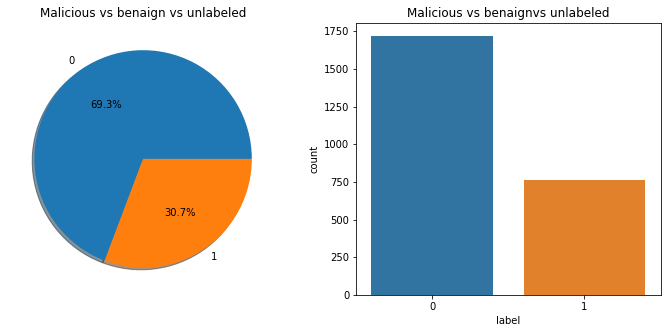

In [415]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df_labeled['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Malicious vs benaign vs unlabeled')
ax[0].set_ylabel('')
sns.countplot('label',data=df_labeled,ax=ax[1])
ax[1].set_title('Malicious vs benaignvs unlabeled')
plt.show()

In [416]:
#TO BALANCE DATASET


### DATA TYPES

In [417]:
numerical = [var for var in data_all_labeled.columns if data_all_labeled[var].dtype != 'O']
categorical = [var for var in data_all_labeled.columns if data_all_labeled[var].dtype == 'O']
discrete = [
    var for var in numerical
    if len(data_all_labeled[var].unique()) < 20
]

numerical = [
    var for var in numerical if var not in discrete
]

In [418]:
discrete

['label',
 'has_debug',
 'has_relocations',
 'has_resources',
 'has_signature',
 'has_tls',
 'registry']

In [419]:
categorical

['sha256',
 'md5',
 'appeared',
 'avclass',
 'histogram',
 'byteentropy',
 'header',
 'section',
 'imports',
 'exports',
 'datadirectories',
 'printabledist']

In [420]:
numerical

['size',
 'vsize',
 'exports_general',
 'imports_general',
 'symbols',
 'numstrings',
 'avlength',
 'printables',
 'entropy',
 'paths',
 'urls',
 'MZ']

In [421]:
print('There are {} categorical variables'.format(len(categorical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 12 categorical variables
There are 7 discrete variables
There are 12 numerical and continuous variables


In [422]:
#Some usefull function for EDA:

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data_all_labeled[variable], bins = 50, density=True)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

def groupby_feature_mean(variable):
    return data_all_labeled[[variable,'label']].groupby("label", as_index = False).mean() 
    
def groupby_feature_size(variable):
    return data_all_labeled[[variable,"label"]].groupby("label", as_index = False).size() 

def basic_statistics(variable):
    print("Number of unique values for variable:", variable , data_all_labeled[variable].nunique())
    print("Maximum value of variable:",variable, data_all_labeled[variable].max())
    print("Minimum value of variable:",variable, data_all_labeled[variable].min())
    print("Mean value of variable:", variable, round(data_all_labeled[variable].mean(),2))
    
def data_remove_outliers(variable):
    
    data_without_outliers=data_all_labeled[np.abs(data_all_labeled[variable]-data_all_labeled[variable].mean()) <= (3*data_all_labeled[variable].std())]
    print('Number of outliers have been removed:', len(data_all_labeled)-len(remove_outliers(variable)))
    
def plot_hist_without_outliers(variable, bins=50):
    plt.figure(figsize = (9,3))
    plt.hist((data_all_labeled[np.abs(data_all_labeled[variable]-data_all_labeled[variable].mean()) <= (3*data_all_labeled[variable].std())])[variable], bins)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution without outliers with hist".format(variable))
    plt.show()
    
def boxplot(variable):
    plt.figure(figsize = (9,3))
    data_all_labeled[variable].plot.box()
    plt.title("{} distribution with boxplot".format(variable))
    plt.show()

def boxplot_without_outliers(variable):
    plt.figure(figsize = (9,3))
    data_all_labeled[np.abs(data_all_labeled[variable]-data_all_labeled[variable].mean()) <= (3*data_all_labeled[variable].std())][variable].plot.box()
    plt.title("{} distribution without outliers with boxplot".format(variable))
    plt.show()

def countplot(variable):
    return sns.countplot(data_all_labeled[variable])
    plt.show()

def findoutliers(variable):
    outliers=[]
    Q1=variable.quantile(.25)
    Q3=variable.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in variable:
        if out1>upper_limit or out1 < lower_limit:
            outliers.append(out1)
    return np.array(outliers)

def plotchart(variable):
    fix, (ax1,ax2) = plt.subplots(1,2, figsize=(7,5))
    sns.boxplot(variable, orient='v', ax=ax1)
    ax1.set_ylabel=variable.name
    ax1.set_title("Box plot of {}".format(variable.name))
    sns.distplot(variable, ax=ax2)
    ax2.set_title('Distribution plot of {}'.format(variable.name))
    
def analysis_column(variable):
    print('Count of outlier ', len(findoutliers(variable)))
    print('Mean', format(variable.mean()))
    print('Median', format(variable.median()))
    print('Max', format(variable.max()))
    print('Min', format(variable.min()))
    plotchart(variable)
    
from scipy.stats import chi2    
def chi_2(variable):
    cross_table=pd.crosstab(data_all_labeled['label'], data_all_labeled[variable])
    observed=cross_table.values
    values=stats.chi2_contingency(cross_table) 
    expected=values[3]
    no_of_rows=len(cross_table.iloc[0:2,0])
    no_of_cols=len(cross_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_cols-1)
    alpha=0.05
    chi_2=sum([(o-e)**2./e for o,e in zip(observed, expected)])
    chi_2_stats=chi_2[0]+chi_2[1]
    critical_value=chi2.ppf(q=1-alpha, df=ddof)
    p_value=1-chi2.cdf(x=chi_2_stats,df=ddof)
    print('chi_2 statistic', chi_2_stats)
    print('critical value', critical_value)
    print('p_value', p_value)
    print("significant level", alpha)
    if chi_2_stats>= critical_value:
        print('Reject H0, There is a relationship between variables')
    else:
        print('Do not reject H0, There is a no relationship between variables')
        
    if p_value <=alpha:
        print('Reject H0, There is a relationship between variables')
    else:
        print('Do not reject H0, There is a no relationship between variables')


### **1. SIZE  - size of the file**,  numerical feature

Count of outlier  272
Mean 1510329.8835616438
Median 325327.0
Max 176798728
Min 642


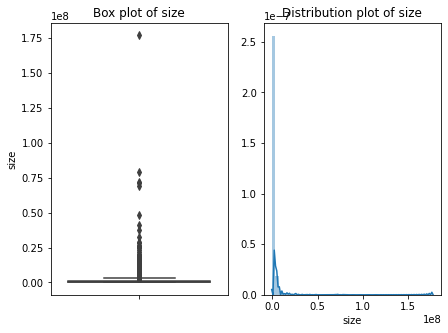

In [423]:
analysis_column(data_all_labeled['size'])

In [424]:
data_all_labeled['size'].nunique()

1699

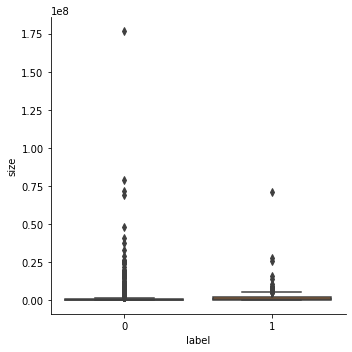

In [425]:
sns.catplot(x="label", y="size", data=data_all_labeled,kind="box")

In [426]:
data_all_labeled.groupby("label").mean()

,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
label,,,,,,,,,,,,,,,,,,
0,1338177.20,1025116.83,0.42,40.30,119.15,0.55,0.95,0.20,0.12,102.12,6555.11,20.14,75237.71,5.60,1.40,7.50,0.30,15.18
1,1898181.07,2524549.37,0.25,2.78,99.78,0.53,0.89,0.19,0.45,99.15,9000.99,59.11,199025.61,5.97,2.38,14.76,0.41,23.80


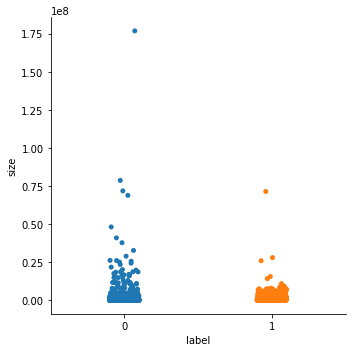

In [427]:
sns.catplot(x="label", y="size", data=data_all_labeled)

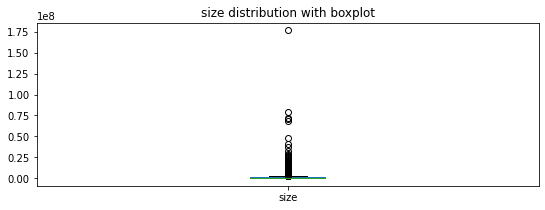

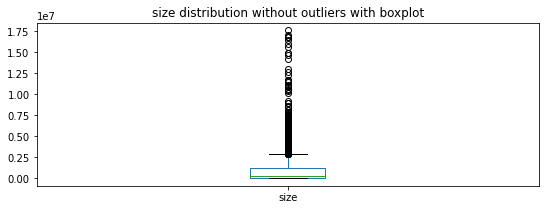

In [428]:
boxplot('size')
boxplot_without_outliers('size')

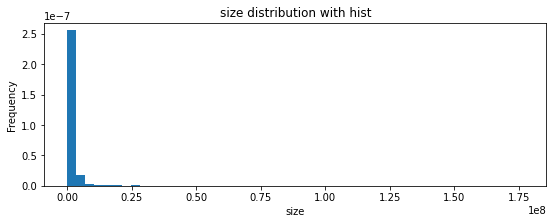

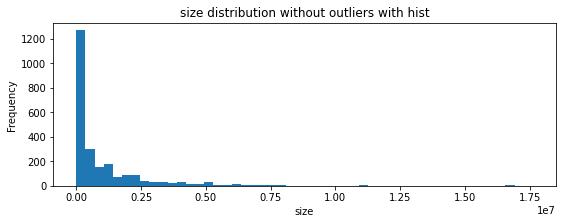

In [429]:
plot_hist('size')
plot_hist_without_outliers('size',50)

# Far away from Gaussian distribution

In [430]:
#LogTransformer
from feature_engine import variable_transformers as vt
lt = vt.LogTransformer(variables = 'size')
lt.fit(data_all_labeled)
data_all_labeled = lt.transform(data_all_labeled)

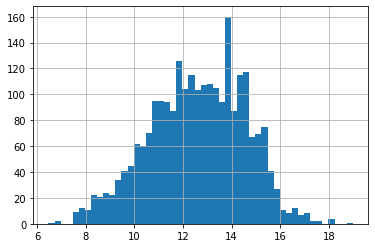

In [431]:
data_all_labeled['size'].hist(bins=50)

In [432]:
#Lets try to cut data into bins
data_all_labeled['size_bins']=pd.cut(data_all_labeled['size'], 10)

In [433]:
data_all_labeled['size_bins'].unique() 

[(13.98, 15.233], (12.728, 13.98], (11.475, 12.728], (15.233, 16.485], (10.222, 11.475], (8.97, 10.222], (16.485, 17.738], (7.717, 8.97], (6.452, 7.717], (17.738, 18.991]]
Categories (10, interval[float64]): [(6.452, 7.717] < (7.717, 8.97] < (8.97, 10.222] < (10.222, 11.475] ... (13.98, 15.233] < (15.233, 16.485] < (16.485, 17.738] < (17.738, 18.991]]

In [434]:
data_all_labeled.groupby('size_bins').size()  # Maybe we should remove more outliers

size_bins
(6.452, 7.717]       12
(7.717, 8.97]        90
(8.97, 10.222]      204
(10.222, 11.475]    414
(11.475, 12.728]    535
(12.728, 13.98]     574
(13.98, 15.233]     455
(15.233, 16.485]    162
(16.485, 17.738]     31
(17.738, 18.991]      5
dtype: int64

In [435]:
data_all_labeled['size_bins'].max()

Interval(17.738, 18.991, closed='right')

<Figure size 432x288 with 0 Axes>

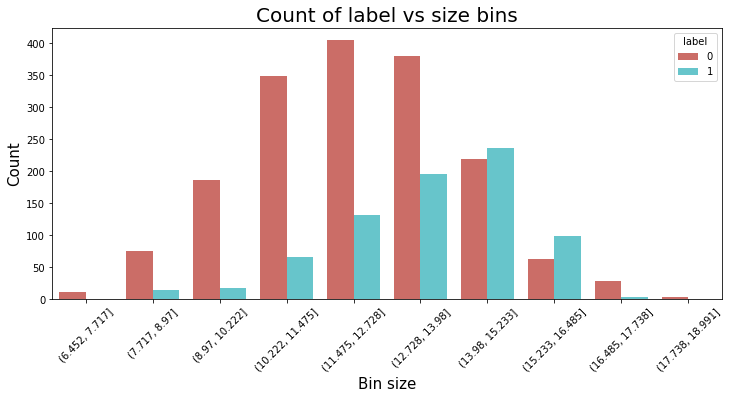

In [436]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(12,5))
sns.countplot(x="size_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs size bins",fontsize=20)
plt.xlabel("Bin size",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [437]:
from scipy import stats

In [438]:
#Calculates a point biserial correlation coefficient and the associated p-value. 
#The point biserial correlation is used to measure the relationship between a binary variable, x, 
#and a continuous variable, y
stats.pointbiserialr(data_all_labeled['size'],data_all_labeled['label'] )

PointbiserialrResult(correlation=0.2982077775224748, pvalue=3.747971539349487e-52)

P-value state if the correlation is statistically significant

In [439]:
np.corrcoef(data_all_labeled['label'],data_all_labeled['size'] )

array([[1.        , 0.29820778],
       [0.29820778, 1.        ]])

In [440]:
R_squared= np.square(stats.pointbiserialr(data_all_labeled['size'],data_all_labeled['label'] )[0])
R_squared

0.08892787857489383

9% od data can be explained by size.

## CONCLUSION:
Size feature has huge scale. We need to preprocess this feature. The ideas is to log transform - it produces gaussian distribution. Then cut values into bins.

On the first glimse of eye I do not see correlation between size and label but point biserial correlation coefficient showed small correlation with significant p-value. So there is no reason to take zero hypotesis.
Correlation was calculated after log transform - before was no correlation!

## **2.VSIZE - the virtual size of the file**

Count of outlier  253
Mean 1486062.4512489927
Median 270336.0
Max 176812032
Min 1056


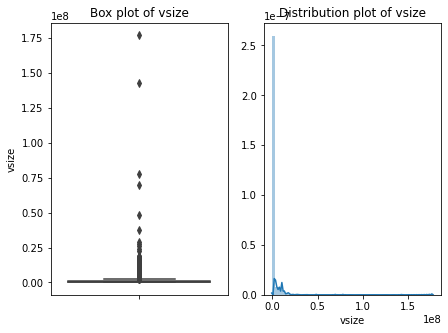

In [441]:
analysis_column(data_all_labeled['vsize'])

In [442]:
data_all_labeled['vsize'].nunique()

632

In [443]:
groupby_feature_mean('vsize')

,label,vsize
0,0,1025116.83
1,1,2524549.37


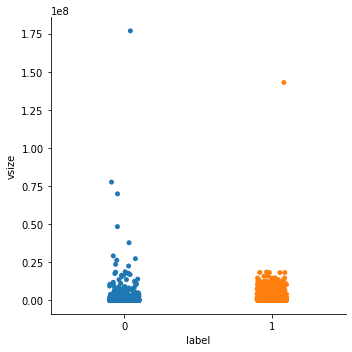

In [444]:
sns.catplot(x="label", y="vsize", data=data_all_labeled)

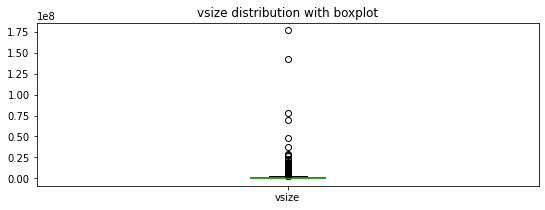

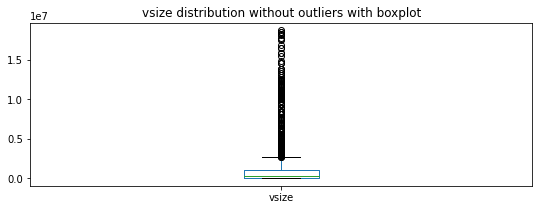

In [445]:
boxplot('vsize')
boxplot_without_outliers('vsize')

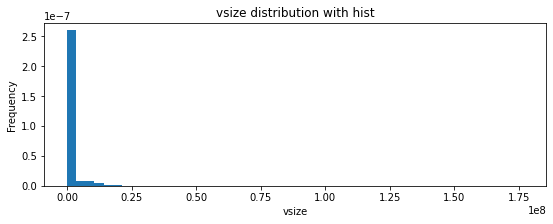

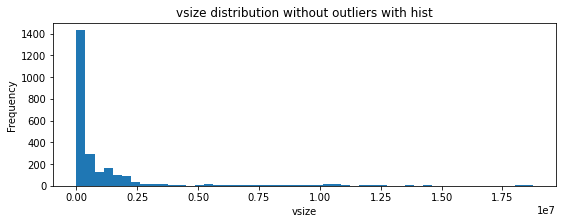

In [446]:
plot_hist('vsize')
plot_hist_without_outliers('vsize',50)

# Far away from Gaussian distribution, right skew

In [447]:
vsize_df=pd.DataFrame(data_all_labeled['vsize'])

In [448]:
#Check how normalization works
from sklearn import preprocessing  # Size variable has huge scale, we have to normalize it or cut into bins - to discuss
vsize = vsize_df #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
size_scaled = min_max_scaler.fit_transform(vsize)
df_vsize = pd.DataFrame(size_scaled)

<function matplotlib.pyplot.show(*args, **kw)>

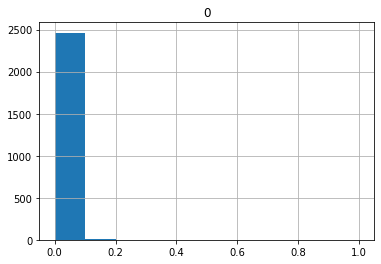

In [449]:
df_vsize.hist() # Not satisfying results
plt.show

In [450]:
df_vsize['size'] = pd.DataFrame(np.random.uniform(-1,1,(10,1)))
df_vsize['norm'] = (1+df_vsize[0])/2 # (-1,1] -> (0,1]
df_vsize['lognorm'] = np.log(df_vsize['norm'])

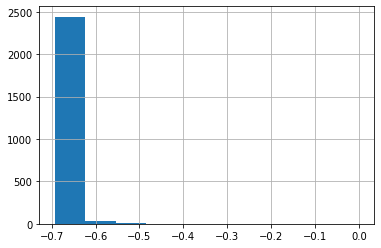

In [451]:
df_vsize['lognorm'].hist()

In [452]:
 #LogTransformer
from feature_engine import variable_transformers as vt
lt = vt.LogTransformer(variables = 'vsize')
lt.fit(data_all_labeled)
data_all_labeled = lt.transform(data_all_labeled)

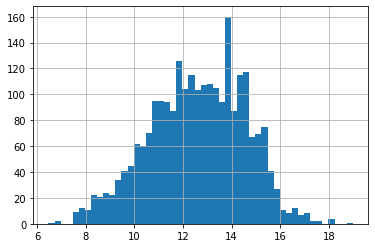

In [453]:
data_all_labeled['size'].hist(bins=50)

In [454]:
#Lets try to cut data into bins
data_all_labeled['vsize_bins']=pd.cut(data_all_labeled['vsize'], 10)

In [455]:
data_all_labeled['vsize_bins'].unique() 

[(11.774, 12.976], (12.976, 14.179], (10.571, 11.774], (9.368, 10.571], (16.585, 17.788], (15.382, 16.585], (14.179, 15.382], (8.165, 9.368], (17.788, 18.991], (6.95, 8.165]]
Categories (10, interval[float64]): [(6.95, 8.165] < (8.165, 9.368] < (9.368, 10.571] < (10.571, 11.774] ... (14.179, 15.382] < (15.382, 16.585] < (16.585, 17.788] < (17.788, 18.991]]

In [456]:
data_all_labeled.groupby('vsize_bins').size()  # Maybe we should remove more outliers

vsize_bins
(6.95, 8.165]         3
(8.165, 9.368]       27
(9.368, 10.571]     291
(10.571, 11.774]    495
(11.774, 12.976]    680
(12.976, 14.179]    507
(14.179, 15.382]    301
(15.382, 16.585]    154
(16.585, 17.788]     20
(17.788, 18.991]      4
dtype: int64

<Figure size 432x288 with 0 Axes>

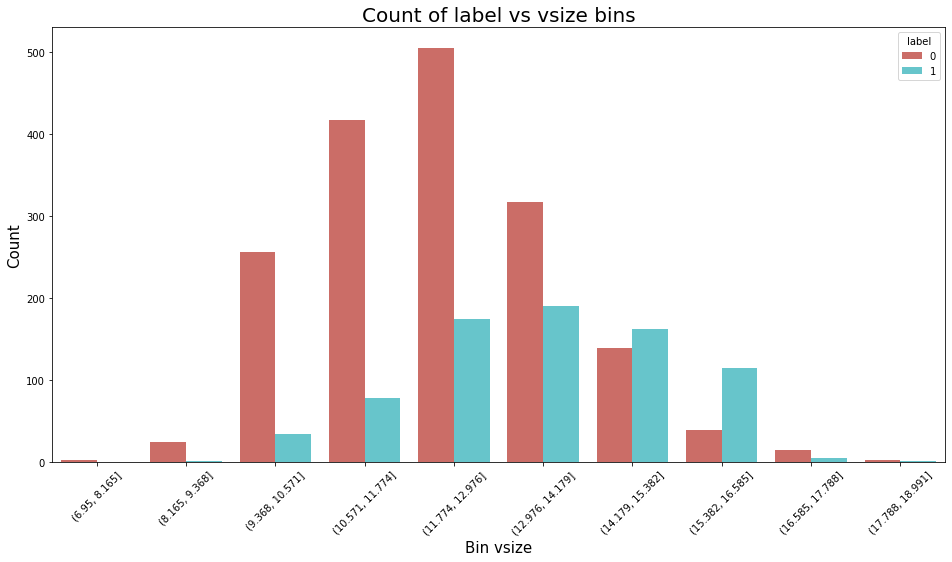

In [457]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="vsize_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs vsize bins",fontsize=20)
plt.xlabel("Bin vsize",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [458]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['vsize'],data_all_labeled['label'] )

PointbiserialrResult(correlation=0.3478470600908202, pvalue=1.620725791461727e-71)

In [459]:
R_squared= np.square(stats.pointbiserialr(data_all_labeled['vsize'],data_all_labeled['label'] )[0])
R_squared

0.1209975772138267

12% of data can be explained by vsize.

## CONCLUSION: 
Virtual size feature has huge scale. We need to preprocess this feature. The ideas to log transform. Than cut into bins.

On the first glimse of eye I do not see correlation between vsize and label but point biserial correlation coefficient showed small correlation with significant p-value. So we cannot reject alternative hypotesis. Correlation was calculated after log transform - before was no correlation!


## **3.EXPORTS_GENERAL - the number of exported functions**

In [460]:
basic_statistics("exports_general")

Number of unique values for variable: exports_general 103
Maximum value of variable: exports_general 26691
Minimum value of variable: exports_general 0
Mean value of variable: exports_general 28.76


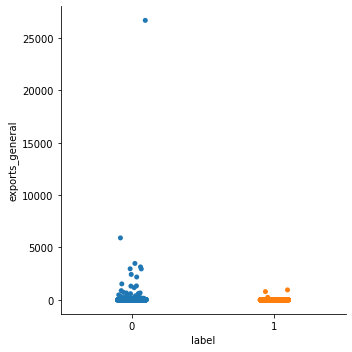

In [461]:
sns.catplot(x="label", y="exports_general", data=data_all_labeled)

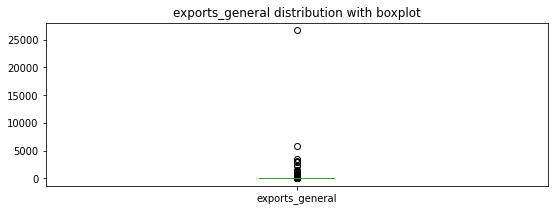

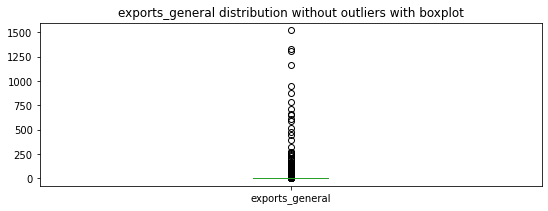

In [462]:
boxplot('exports_general')
boxplot_without_outliers('exports_general')

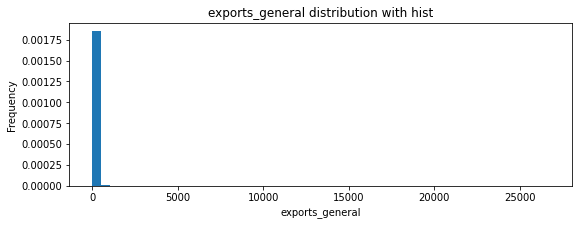

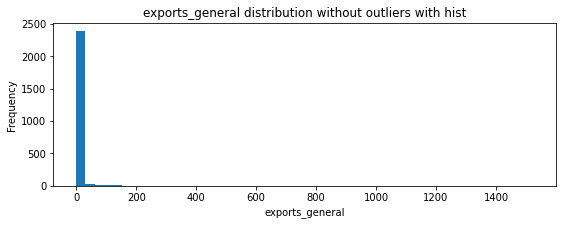

In [463]:
plot_hist('exports_general')
plot_hist_without_outliers('exports_general',50)

# Far away from Gaussian distribution

In [464]:
#Lets try to cut data into bins
data_all_labeled['exports_general_bins']=pd.cut(data_all_labeled['exports_general'], 20)

In [465]:
data_all_labeled['exports_general_bins'].unique() 

[(-26.691, 1334.55], (1334.55, 2669.1], (2669.1, 4003.65], (25356.45, 26691.0], (5338.2, 6672.75]]
Categories (5, interval[float64]): [(-26.691, 1334.55] < (1334.55, 2669.1] < (2669.1, 4003.65] < (5338.2, 6672.75] < (25356.45, 26691.0]]

In [466]:
data_check=data_all_labeled[data_all_labeled['exports_general'] != 0]

In [467]:
data_check.sample(2)

,sha256,md5,appeared,label,avclass,histogram,byteentropy,header,section,imports,...,printabledist,printables,entropy,paths,urls,registry,MZ,size_bins,vsize_bins,exports_general_bins
1042,112d87e88e9570526b9a464eb295ca5874f7c43b329bb4...,af66ce4926c00490765dfa00e5e6c2d4,2018-01,0,,"[58050, 1813, 1462, 811, 2056, 425, 593, 509, ...","[28664, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,...","{'coff': {'timestamp': 1290254117, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'msvcrt.dll': ['realloc', '_except_handler4_c...",...,"[269, 20, 13, 12, 45, 18, 9, 61, 49, 14, 15, 3...",10869,6.09,0,0,0,2,"(11.475, 12.728]","(11.774, 12.976]","(-26.691, 1334.55]"
739,97f750bf9c197d51ee7b33c672f0b23e2ab37948cd0c3b...,6a821ca751a0df3860dba9470572f898,2009-07,0,,"[24271, 920, 428, 465, 955, 230, 158, 357, 615...","[12288, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{'coff': {'timestamp': 962227340, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['DeleteCriticalSection', 'In...",...,"[136, 36, 97, 16, 197, 13, 7, 7, 20, 6, 9, 8, ...",6841,5.99,0,0,0,1,"(10.222, 11.475]","(11.774, 12.976]","(-26.691, 1334.55]"


In [468]:
data_check.groupby('label').mean()

,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
label,,,,,,,,,,,,,,,,,,
0,12.23,12.29,0.57,160.72,179.18,0.89,0.91,0.22,0.14,62.85,4758.62,15.68,69974.93,5.69,1.92,6.82,0.42,5.45
1,14.12,14.30,0.08,41.61,251.41,0.86,0.94,0.04,0.51,1401.33,28027.27,15.20,393555.04,5.97,22.61,3.41,0.47,30.78


If there is exports there is more probability that PE will be good

<Figure size 432x288 with 0 Axes>

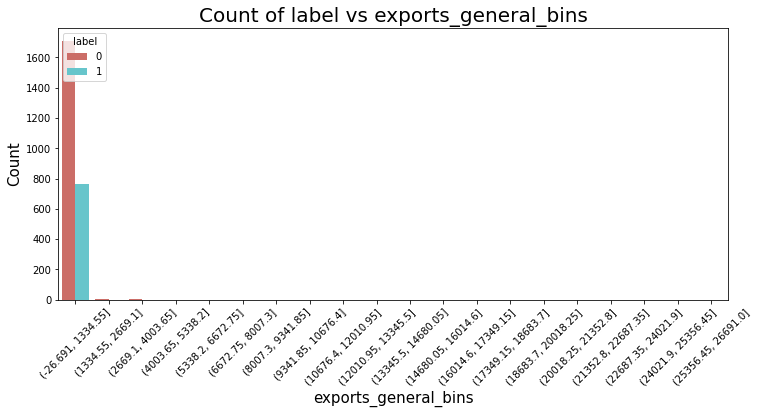

In [469]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(12,5))
sns.countplot(x="exports_general_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs exports_general_bins",fontsize=20)
plt.xlabel("exports_general_bins",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [470]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['exports_general'],data_all_labeled['label'] )

PointbiserialrResult(correlation=-0.0303234439374345, pvalue=0.13096934092025217)

In [471]:
#Correlation after removing zeros:
stats.pointbiserialr(data_check['exports_general'],data_check['label'] )

PointbiserialrResult(correlation=-0.02843289457467523, pvalue=0.5334586389989852)

## Conclusion: 
no correlation, a lot of zeros, after removing zeros :  if there is exports there is more probability that PE will be good. Maybe we could encoder this feature for 1 - if there is export and 0 - if not - not sure if makes sense.

## **4. IMPORTS_GENERAL - number of imported functions, continuous feature**

In [472]:
basic_statistics("imports_general")

Number of unique values for variable: imports_general 420
Maximum value of variable: imports_general 4222
Minimum value of variable: imports_general 0
Mean value of variable: imports_general 113.2


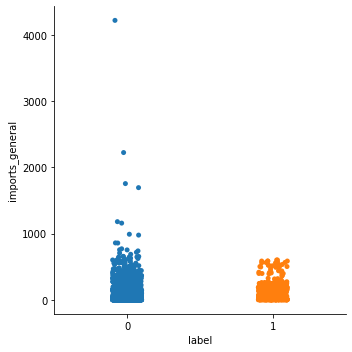

In [473]:
sns.catplot(x="label", y="imports_general", data=data_all_labeled)

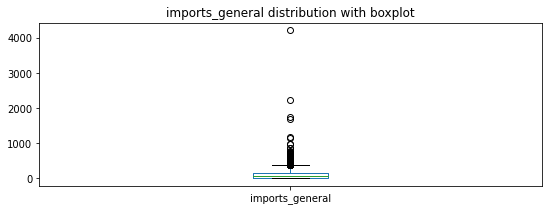

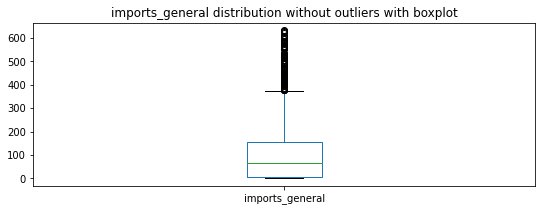

In [474]:
boxplot('imports_general')
boxplot_without_outliers('imports_general')

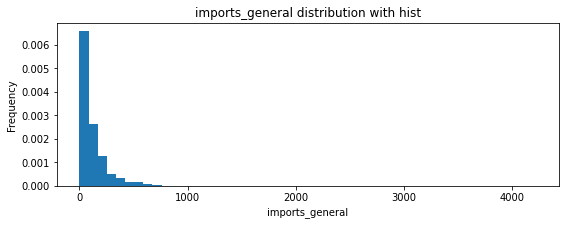

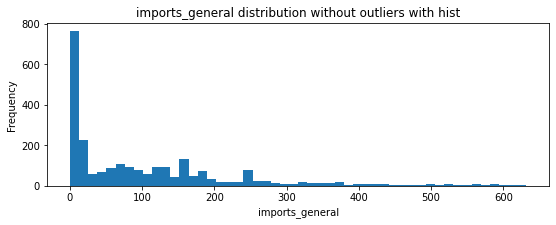

In [475]:
plot_hist('imports_general')
plot_hist_without_outliers('imports_general',50)

# Right skew

In [476]:
import_df=pd.DataFrame(data_all_labeled['imports_general'])

In [477]:
#Check how normalization works
importdf = import_df #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
import_scaled = min_max_scaler.fit_transform(importdf)
importdf = pd.DataFrame(import_scaled)

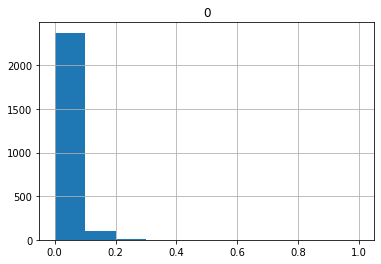

In [478]:
importdf.hist() # Not satisfying results
plt.show()

In [479]:
importdf['size'] = pd.DataFrame(np.random.uniform(-1,1,(10,1)))
importdf['norm'] = (1+importdf[0])/2 # (-1,1] -> (0,1]
importdf['lognorm'] = np.log(importdf['norm'])

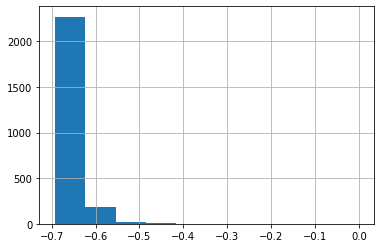

In [480]:
importdf['lognorm'].hist()

In [481]:
#Lets try to cut data into bins
data_all_labeled['imports_bins']=pd.cut(data_all_labeled['imports_general'], 10)

In [482]:
data_all_labeled['imports_bins'].unique() 

[(-4.222, 422.2], (422.2, 844.4], (2111.0, 2533.2], (844.4, 1266.6], (3799.8, 4222.0], (1688.8, 2111.0]]
Categories (6, interval[float64]): [(-4.222, 422.2] < (422.2, 844.4] < (844.4, 1266.6] < (1688.8, 2111.0] < (2111.0, 2533.2] < (3799.8, 4222.0]]

<Figure size 432x288 with 0 Axes>

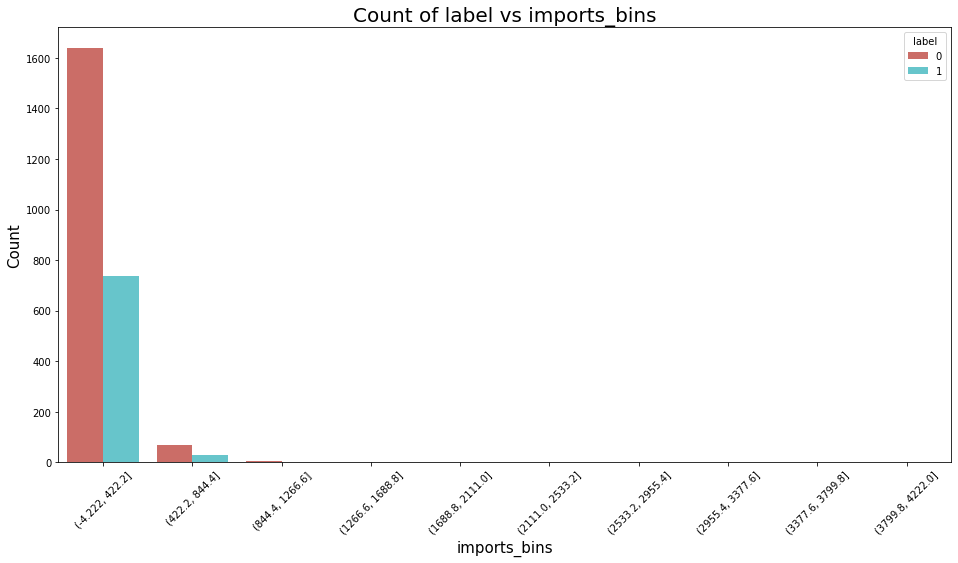

In [483]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="imports_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs imports_bins",fontsize=20)
plt.xlabel("imports_bins",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [484]:
data_check=data_all_labeled[data_all_labeled['imports_general'] != 0]

In [485]:
data_check.groupby('label').mean()

,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
label,,,,,,,,,,,,,,,,,,
0,12.46,12.37,0.45,45.98,137.37,0.55,0.96,0.20,0.13,117.74,7296.63,15.97,82805.05,5.73,1.59,7.96,0.33,16.97
1,13.49,13.54,0.25,2.83,101.51,0.54,0.90,0.19,0.46,100.78,9117.35,60.02,202229.19,5.97,2.42,15.01,0.42,24.08


In [486]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['imports_general'],data_all_labeled['label'] )

PointbiserialrResult(correlation=-0.05168282931525383, pvalue=0.010016887409517023)

## CONCLUSION :
 similar to exports_general, no correlation, to remove this feature!

## **5. HAS_DEBUG  - discrete feature, information wheater PE file has debug**

In [487]:
data_all_labeled.groupby('label').mean()

,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
label,,,,,,,,,,,,,,,,,,
0,12.22,12.21,0.42,40.30,119.15,0.55,0.95,0.20,0.12,102.12,6555.11,20.14,75237.71,5.60,1.40,7.50,0.30,15.18
1,13.48,13.53,0.25,2.78,99.78,0.53,0.89,0.19,0.45,99.15,9000.99,59.11,199025.61,5.97,2.38,14.76,0.41,23.80


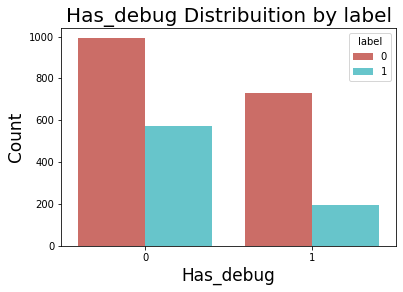

In [488]:
sns.countplot(x="has_debug", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has_debug Distribuition by label', fontsize=20)
plt.xlabel('Has_debug',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no debug the probability of malicious PE increases

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


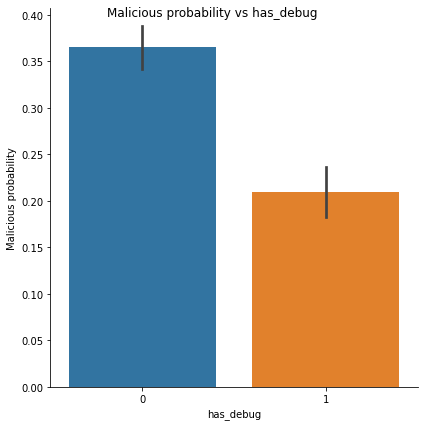

In [489]:
g = sns.factorplot(x = "has_debug", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_debug")
plt.show()

#We see that if there is no debug the probability of malicious PE increases

In [490]:
chi_2('has_debug')

chi_2 statistic 65.86567530315823
critical value 3.841458820694124
p_value 4.440892098500626e-16
significant level 0.05
Reject H0, There is a relationship between variables
Reject H0, There is a relationship between variables


## CONCLUSION :
keep the variable, as there is a correlation between has_debug variable and label.

## **6. HAS_RELOCATION  - categorical feature, information wheater PE file has relocation**

In [491]:
data_all_labeled.groupby('label').mean()

,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
label,,,,,,,,,,,,,,,,,,
0,12.22,12.21,0.42,40.30,119.15,0.55,0.95,0.20,0.12,102.12,6555.11,20.14,75237.71,5.60,1.40,7.50,0.30,15.18
1,13.48,13.53,0.25,2.78,99.78,0.53,0.89,0.19,0.45,99.15,9000.99,59.11,199025.61,5.97,2.38,14.76,0.41,23.80


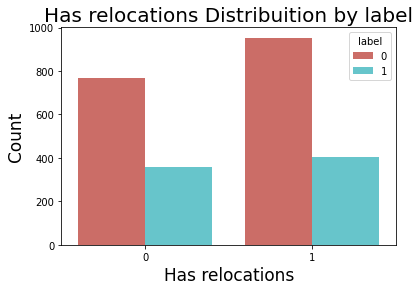

In [492]:
sns.countplot(x="has_relocations", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has relocations Distribuition by label', fontsize=20)
plt.xlabel('Has relocations',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no debug the probability of malicious PE increases

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


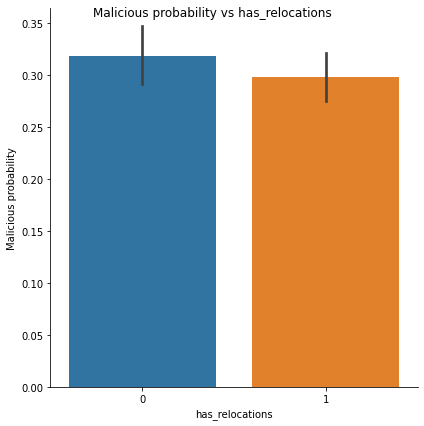

In [493]:
g = sns.factorplot(x = "has_relocations", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_relocations")
plt.show()

#We see that if there is no relocations the probability of malicious PE increases

In [494]:
chi_2('has_relocations')

chi_2 statistic 1.187102408573332
critical value 3.841458820694124
p_value 0.2759148149267704
significant level 0.05
Do not reject H0, There is a no relationship between variables
Do not reject H0, There is a no relationship between variables


## CONCLUSION :
remove this variable,  there is no correlation between variable and label.

## **7. HAS_RESOURCES  - categorical feature, information wheater PE file has resources**

In [495]:
data_all_labeled.groupby('label').mean()['has_resources']

label
0   0.95
1   0.89
Name: has_resources, dtype: float64

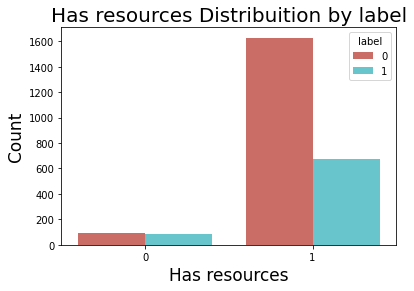

In [496]:
sns.countplot(x="has_resources", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has resources Distribuition by label', fontsize=20)
plt.xlabel('Has resources',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no debug the probability of malicious PE increases

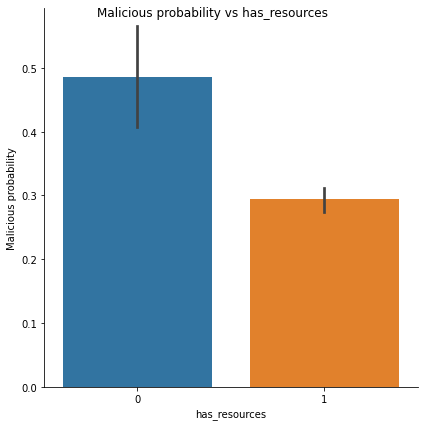

In [497]:
g = sns.factorplot(x = "has_resources", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_resources")
plt.show()

#We see that if there is no resources the probability of malicious PE increases

In [498]:
chi_2('has_resources')

chi_2 statistic 28.510207008624974
critical value 3.841458820694124
p_value 9.320583271854588e-08
significant level 0.05
Reject H0, There is a relationship between variables
Reject H0, There is a relationship between variables


## CONCLUSION:
keep the variable, as there is a correlation between variable and label.

## **8. HAS_SIGNATURE  - categorical feature, information wheater PE file has signature**

In [499]:
data_all_labeled.groupby('label').mean()['has_signature']

label
0   0.20
1   0.19
Name: has_signature, dtype: float64

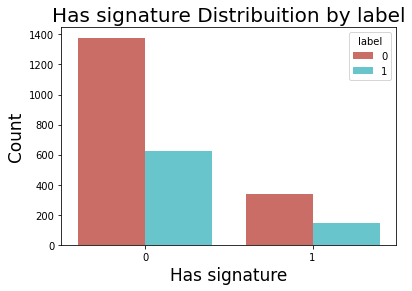

In [500]:
sns.countplot(x="has_signature", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has signature Distribuition by label', fontsize=20)
plt.xlabel('Has signature',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no signature the probability of malicious PE increases

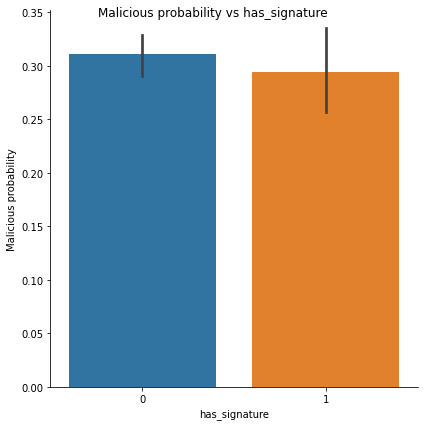

In [501]:
g = sns.factorplot(x = "has_signature", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_signature")
plt.show()

#We see that if there is no signature the probability of malicious PE increases

In [502]:
chi_2('has_signature')

chi_2 statistic 0.5070882741943668
critical value 3.841458820694124
p_value 0.4764020437979515
significant level 0.05
Do not reject H0, There is a no relationship between variables
Do not reject H0, There is a no relationship between variables


## CONCLUSION :
confused, I thought that this is very important feature but not - to check again!

## **8. HAS_TLS  - categorical feature, information wheater PE file has tls**

In [503]:
data_all_labeled.groupby('label').mean()['has_tls']

label
0   0.12
1   0.45
Name: has_tls, dtype: float64

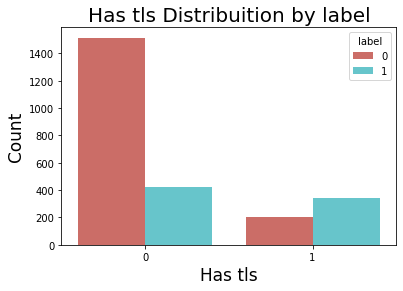

In [504]:
sns.countplot(x="has_tls", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has tls Distribuition by label', fontsize=20)
plt.xlabel('Has tls',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no tls the probability of malicious PE increases

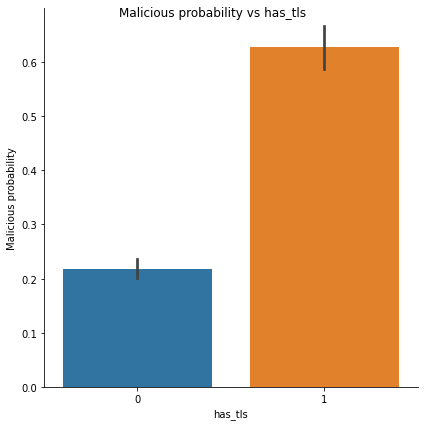

In [505]:
g = sns.factorplot(x = "has_tls", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_tls")
plt.show()

#We see that if there is tls the probability of malicious PE increases

In [506]:
chi_2('has_tls')

chi_2 statistic 336.6995031600775
critical value 3.841458820694124
p_value 0.0
significant level 0.05
Reject H0, There is a relationship between variables
Reject H0, There is a relationship between variables


## CONCLUSION: 
keep the variable, as there is a correlation between variable and label.

## **8. SYMBOLS  -**

In [507]:
basic_statistics('symbols')

Number of unique values for variable: symbols 28
Maximum value of variable: symbols 131660
Minimum value of variable: symbols 0
Mean value of variable: symbols 101.21


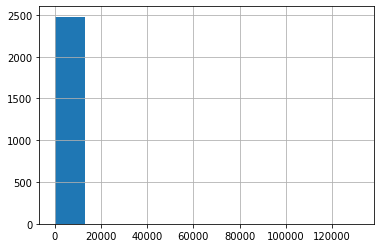

In [508]:
data_all_labeled['symbols'].hist()

In [509]:
data_all_labeled.symbols.unique()

array([     0,     53,   5276,   1622,   5504,    364,   1146,      4,
           33,     26,   1071,    865,     46,     38,     12,     15,
           19,     62,   3707,  18772,  71468,   2400,   1621,    329,
         3253,    191,   1641, 131660])

In [510]:
data_all_labeled[["symbols","label"]].groupby(["label"], as_index = False).mean() 

,label,symbols
0,0,102.12
1,1,99.15


In [511]:
data_all_labeled.groupby('symbols').mean()  #For particular symbols label is always 1.

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
symbols,,,,,,,,,,,,,,,,,,
0,0.31,12.61,12.62,0.37,28.80,113.09,0.55,0.93,0.20,0.22,7240.94,32.27,107168.06,5.72,1.59,9.76,0.34,17.97
4,0.00,9.10,9.70,1.00,1.00,0.00,1.00,1.00,0.00,0.00,10.00,15.90,159.00,4.91,0.00,0.00,0.00,1.00
12,0.00,12.47,11.41,1.00,0.00,124.00,0.00,1.00,1.00,0.00,367.00,11.17,4101.00,5.70,0.00,0.00,0.00,1.00
15,0.00,12.38,12.52,0.00,192.00,112.00,1.00,1.00,1.00,0.00,1519.00,13.69,20794.00,5.65,7.00,38.00,0.00,1.00
19,0.00,9.20,10.72,1.00,5.00,12.00,1.00,0.00,0.00,0.00,68.00,14.81,1007.00,5.13,0.00,0.00,0.00,1.00
26,0.00,11.21,11.15,1.00,23.00,107.00,1.00,1.00,0.00,0.00,853.00,18.82,16056.00,4.86,0.00,0.00,0.00,1.00
33,0.00,11.32,12.52,1.00,54.00,117.00,1.00,1.00,0.00,0.00,691.00,9.90,6841.00,5.99,0.00,0.00,0.00,1.00
38,1.00,13.50,12.67,0.00,0.00,76.00,0.00,1.00,0.00,0.00,1122.00,8.12,9113.00,5.79,0.00,0.00,0.00,1.00
46,1.00,13.57,13.62,0.00,0.00,76.00,0.00,1.00,0.00,0.00,2637.00,7.06,18614.00,5.93,0.00,0.00,0.00,1.00


In [512]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['symbols'],data_all_labeled['label'] )

PointbiserialrResult(correlation=-0.00045209462168308587, pvalue=0.9820396496547169)

## CONCLUSION:
there are symbols that belongs only to label 1. To remove

## **9. NUMSTRINGS -**

In [513]:
basic_statistics('numstrings')

Number of unique values for variable: numstrings 1779
Maximum value of variable: numstrings 829216
Minimum value of variable: numstrings 2
Mean value of variable: numstrings 7307.01


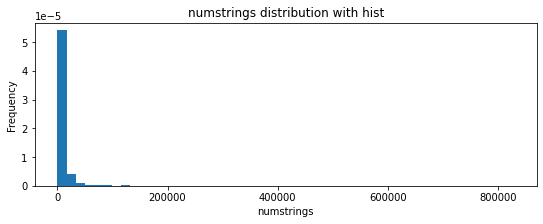

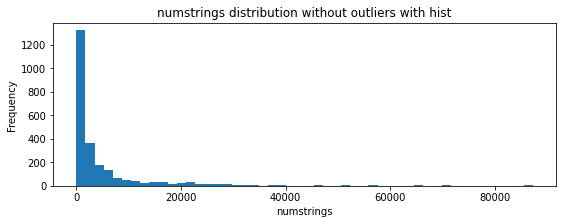

In [514]:
plot_hist('numstrings')
plot_hist_without_outliers('numstrings',50)

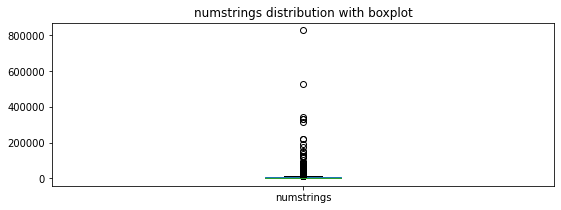

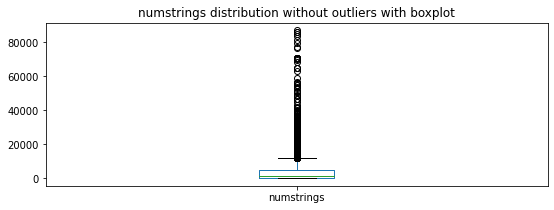

In [515]:
boxplot('numstrings')
boxplot_without_outliers('numstrings')

In [516]:
#Lets try to cut data into bins
data_all_labeled['numstrings_bins']=pd.cut(data_all_labeled['numstrings'], 10)

In [517]:
data_all_labeled['numstrings_bins'].unique() 

[(-827.214, 82923.4], (82923.4, 165844.8], (165844.8, 248766.2], (331687.6, 414609.0], (746294.6, 829216.0], (248766.2, 331687.6], (497530.4, 580451.8]]
Categories (7, interval[float64]): [(-827.214, 82923.4] < (82923.4, 165844.8] < (165844.8, 248766.2] < (248766.2, 331687.6] < (331687.6, 414609.0] < (497530.4, 580451.8] < (746294.6, 829216.0]]

<Figure size 432x288 with 0 Axes>

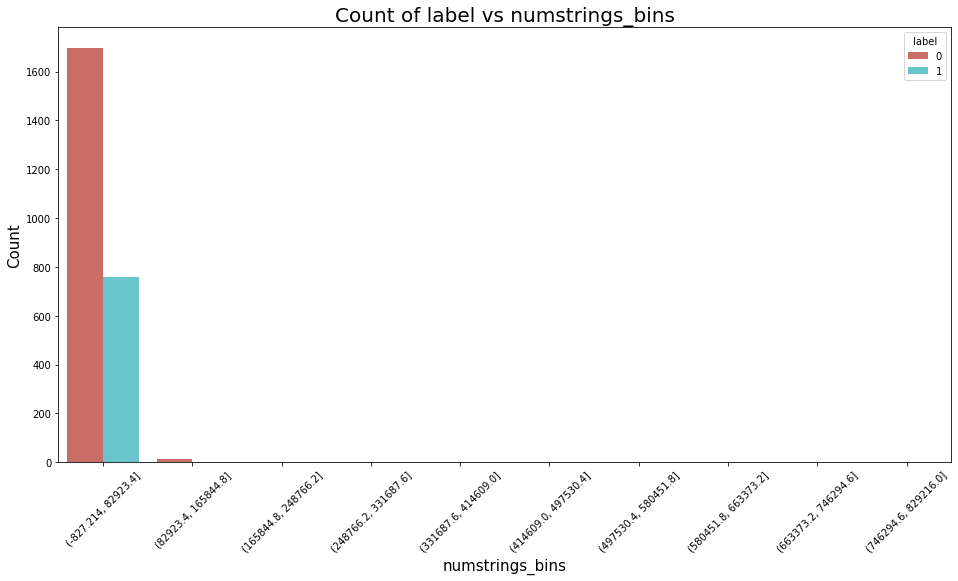

In [518]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="numstrings_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs numstrings_bins",fontsize=20)
plt.xlabel("numstrings_bins",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

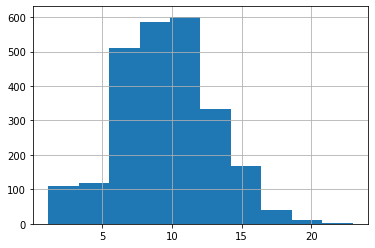

In [519]:
 #LogTransformer
from feature_engine import variable_transformers as vt



yjt = vt.YeoJohnsonTransformer(variables = 'numstrings')

yjt.fit(data_all_labeled)
data_all_labeled = yjt.transform(data_all_labeled)


data_all_labeled['numstrings'].hist()

In [520]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['numstrings'],data_all_labeled['label'] )

PointbiserialrResult(correlation=0.25924111032448827, pvalue=2.1033928451973234e-39)

## CONCLUSION:
- after normalizing, there is a correlation!

## **9. AVLENGTH -**

In [521]:
basic_statistics('avlength')

Number of unique values for variable: avlength 2359
Maximum value of variable: avlength 10117.533854166666
Minimum value of variable: avlength 5.474036850921273
Mean value of variable: avlength 32.12


In [522]:
data_all_labeled[["avlength","label"]].groupby(["label"], as_index = False).mean() 

,label,avlength
0,0,20.14
1,1,59.11


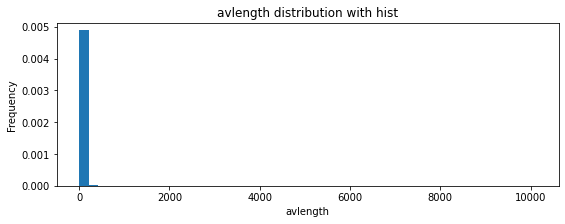

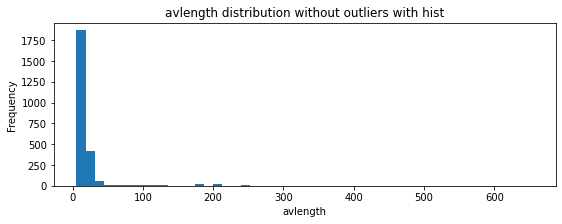

In [523]:
plot_hist('avlength')
plot_hist_without_outliers('avlength',50)

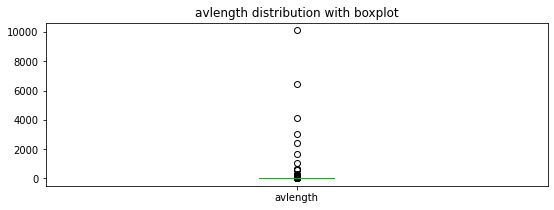

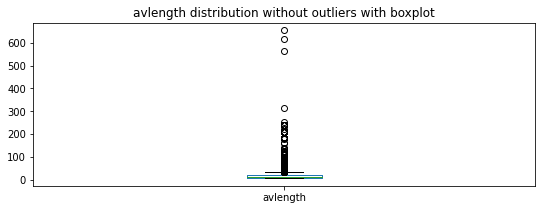

In [524]:
boxplot('avlength')
boxplot_without_outliers('avlength')

In [525]:
#Lets try to cut data into bins
data_all_labeled['avlength_bins']=pd.cut(data_all_labeled['avlength'], 10)

<Figure size 432x288 with 0 Axes>

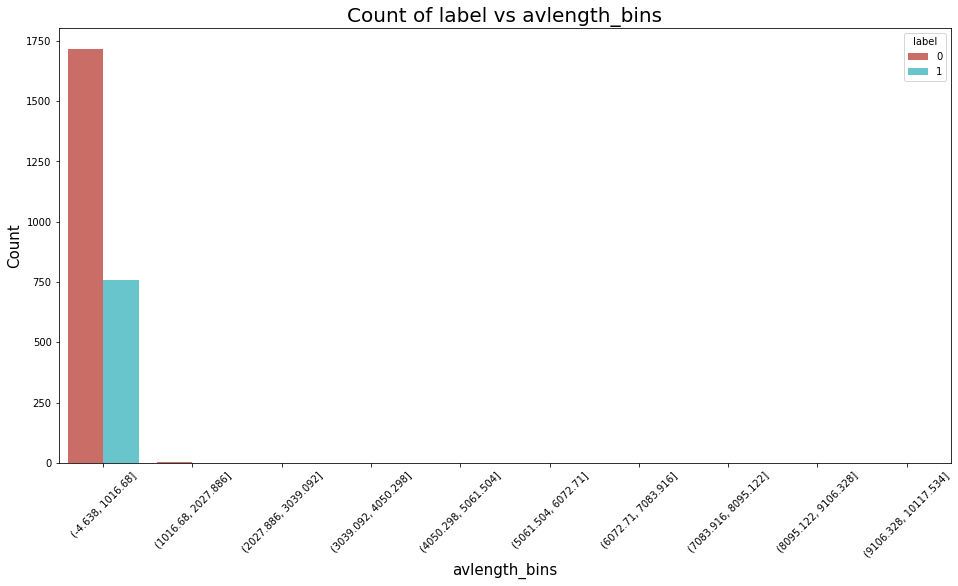

In [526]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="avlength_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs avlength_bins",fontsize=20)
plt.xlabel("avlength_bins",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

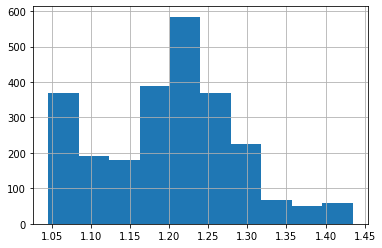

In [527]:
 #LogTransformer
from feature_engine import variable_transformers as vt



yjt = vt.YeoJohnsonTransformer(variables = 'avlength')

yjt.fit(data_all_labeled)
data_all_labeled = yjt.transform(data_all_labeled)


data_all_labeled['avlength'].hist()

In [528]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['avlength'],data_all_labeled['label'] )

PointbiserialrResult(correlation=-0.15181478117473962, pvalue=2.87860877360413e-14)

CONCLUSION - no correlation

**10. ENTROPY -**

In [529]:
basic_statistics('entropy')

Number of unique values for variable: entropy 2437
Maximum value of variable: entropy 6.584920302022384
Minimum value of variable: entropy 0.3703837269425533
Mean value of variable: entropy 5.72


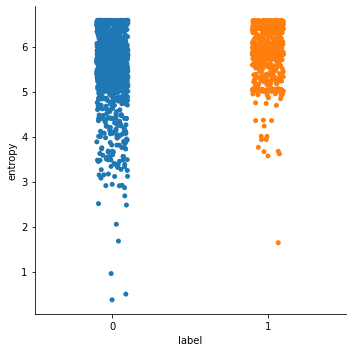

In [530]:
sns.catplot(x="label", y="entropy", data=data_all_labeled)

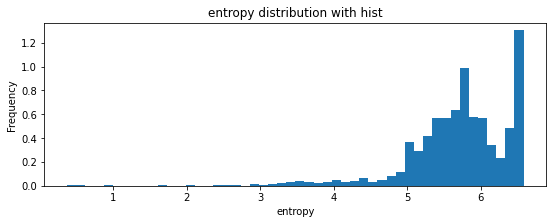

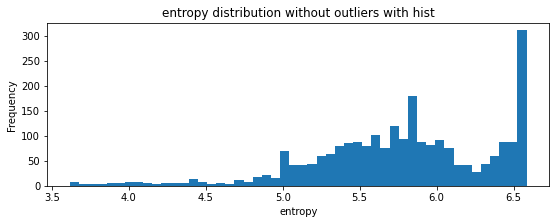

In [531]:
plot_hist('entropy')
plot_hist_without_outliers('entropy',50)

In [532]:
data_all_labeled[["entropy","label"]].groupby(["label"], as_index = False).mean() #Almost the same for both classes

,label,entropy
0,0,5.60
1,1,5.97


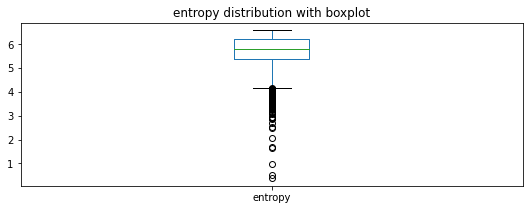

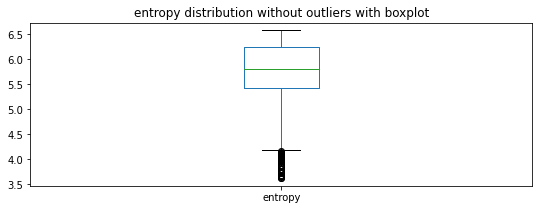

In [533]:
boxplot('entropy')
boxplot_without_outliers('entropy')

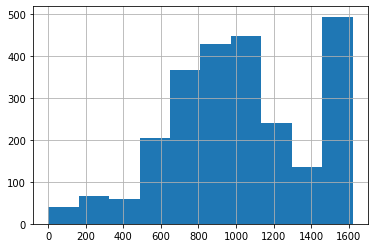

In [534]:
yjt = vt.YeoJohnsonTransformer(variables = 'entropy')
yjt.fit(data_all_labeled)
data_all_labeled = yjt.transform(data_all_labeled)
data_all_labeled['entropy'].hist()

In [535]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['entropy'],data_all_labeled['label'] )

PointbiserialrResult(correlation=0.27476641233428356, pvalue=3.0914089524885055e-44)

## CONCLUSION :
small correlation

## **11. PATHS -**

In [536]:
basic_statistics('paths')

Number of unique values for variable: paths 37
Maximum value of variable: paths 1025
Minimum value of variable: paths 0
Mean value of variable: paths 1.7


In [537]:
data_all_labeled[["paths","label"]].groupby(["label"], as_index = False).mean() 

,label,paths
0,0,1.40
1,1,2.38


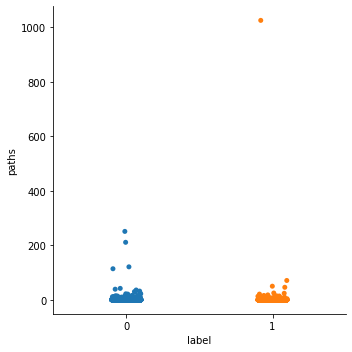

In [538]:
sns.catplot(x="label", y="paths", data=data_all_labeled)

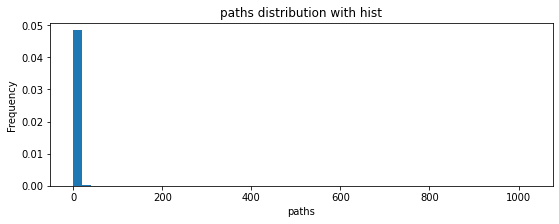

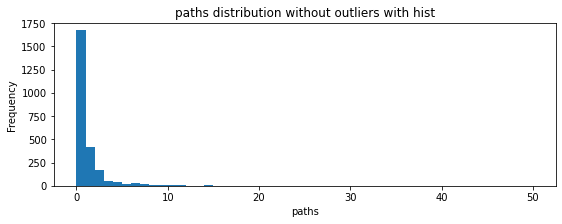

In [539]:
plot_hist('paths')
plot_hist_without_outliers('paths',50)

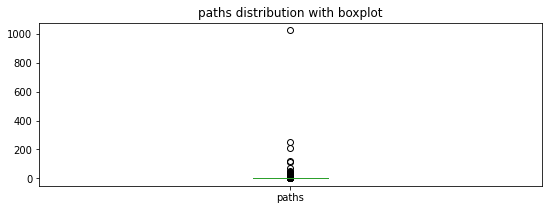

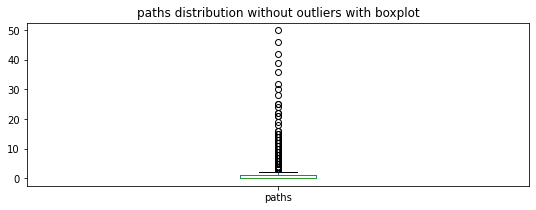

In [540]:
boxplot('paths')
boxplot_without_outliers('paths')

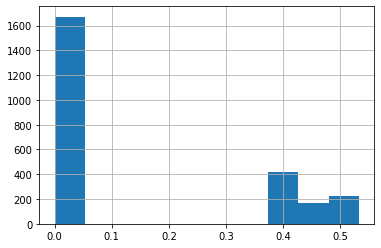

In [541]:
yjt = vt.YeoJohnsonTransformer(variables = 'paths')
yjt.fit(data_all_labeled)
data_all_labeled = yjt.transform(data_all_labeled)
data_all_labeled['paths'].hist()

In [542]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['paths'],data_all_labeled['label'] )

PointbiserialrResult(correlation=-0.0793812800588724, pvalue=7.526237703810264e-05)

CONCLUSION - no correlation

**12. URL -**

In [543]:
basic_statistics('urls')

Number of unique values for variable: urls 102
Maximum value of variable: urls 470
Minimum value of variable: urls 0
Mean value of variable: urls 9.73


In [544]:
data_all_labeled[["urls","label"]].groupby(["label"], as_index = False).mean() 

,label,urls
0,0,7.50
1,1,14.76


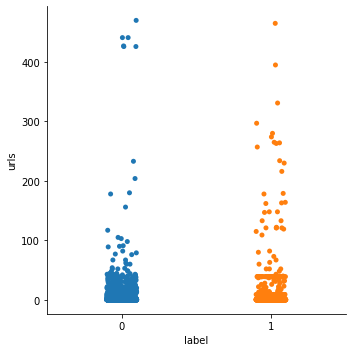

In [545]:
sns.catplot(x="label", y="urls", data=data_all_labeled)

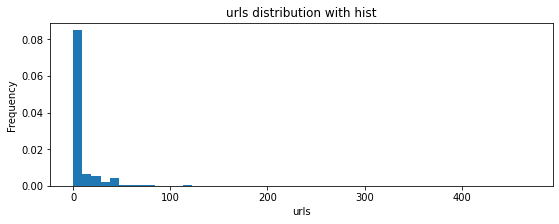

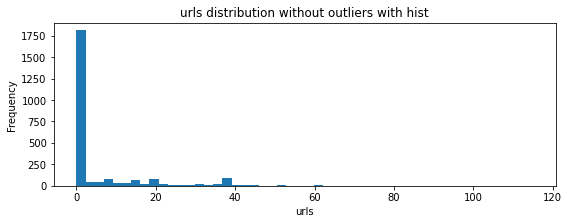

In [546]:
plot_hist('urls')
plot_hist_without_outliers('urls',50)

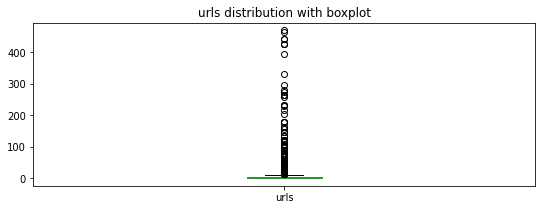

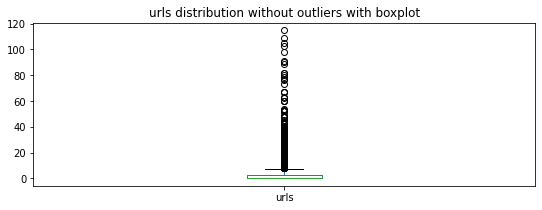

In [547]:
boxplot('urls')
boxplot_without_outliers('urls')

In [548]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['urls'],data_all_labeled['label'] )

PointbiserialrResult(correlation=0.0947200165800541, pvalue=2.276656574882888e-06)

CONCLUSION - no correlation

**11. MZ -**

In [549]:
basic_statistics('MZ')

Number of unique values for variable: MZ 141
Maximum value of variable: MZ 2782
Minimum value of variable: MZ 1
Mean value of variable: MZ 17.83


In [550]:
data_all_labeled[["MZ","label"]].groupby(["label"], as_index = False).mean() 

,label,MZ
0,0,15.18
1,1,23.80


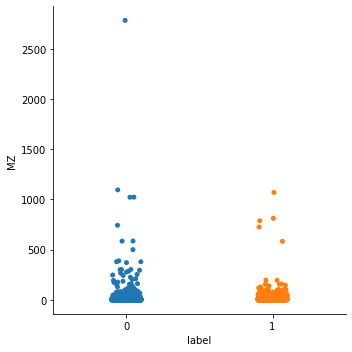

In [551]:
sns.catplot(x="label", y="MZ", data=data_all_labeled)

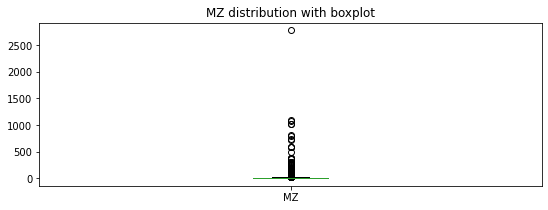

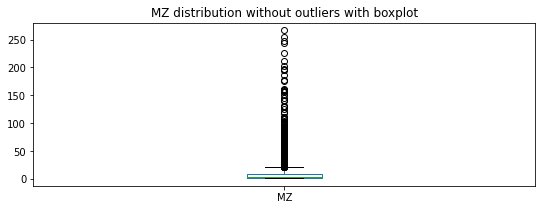

In [552]:
boxplot('MZ')
boxplot_without_outliers('MZ')

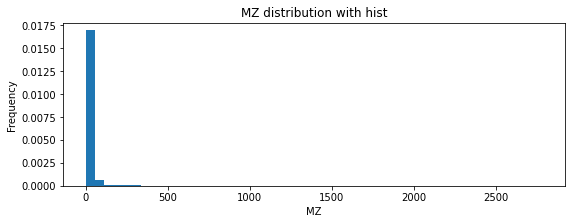

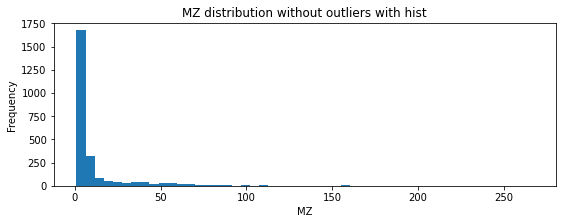

In [553]:
plot_hist('MZ')
plot_hist_without_outliers('MZ',50)

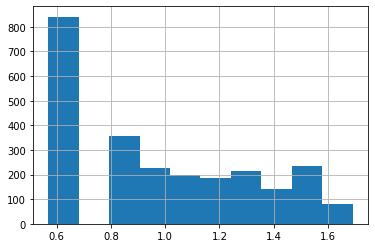

In [554]:
yjt = vt.YeoJohnsonTransformer(variables = 'MZ')
yjt.fit(data_all_labeled)
data_all_labeled = yjt.transform(data_all_labeled)
data_all_labeled['MZ'].hist()

In [555]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['MZ'],data_all_labeled['label'] )

PointbiserialrResult(correlation=0.3949733879880867, pvalue=1.8589048209048164e-93)

## CONCLUSION:
there is a correlation

## **12.registry**

In [556]:
basic_statistics('registry')

Number of unique values for variable: registry 19
Maximum value of variable: registry 29
Minimum value of variable: registry 0
Mean value of variable: registry 0.34


In [557]:
data_all_labeled[["registry","label"]].groupby(["label"], as_index = False).mean() 

,label,registry
0,0,0.30
1,1,0.41


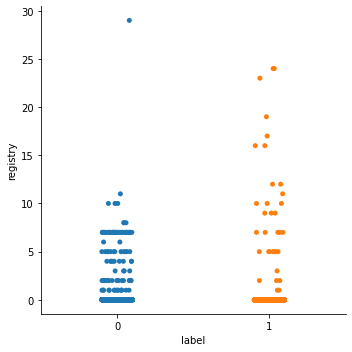

In [558]:
sns.catplot(x="label", y="registry", data=data_all_labeled)

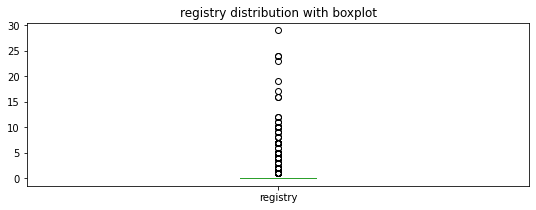

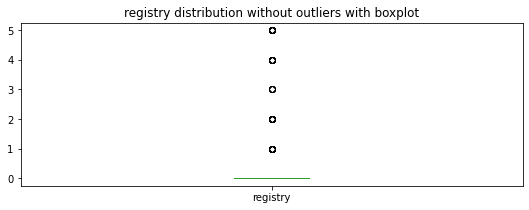

In [559]:
boxplot('registry')
boxplot_without_outliers('registry')

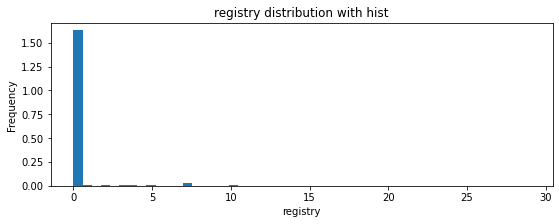

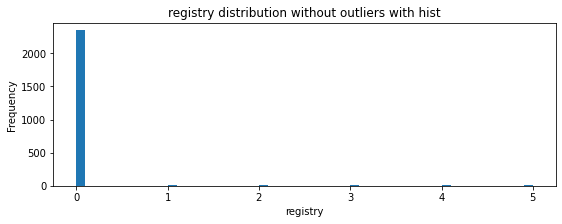

In [560]:
plot_hist('registry')
plot_hist_without_outliers('registry',50)

In [561]:
#Calculates a point biserial correlation coefficient and the associated p-value. The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y
stats.pointbiserialr(data_all_labeled['registry'],data_all_labeled['label'] )

PointbiserialrResult(correlation=0.027596471364347976, pvalue=0.16931244630942602)

## CONCLUSION:
no relationship

In [562]:
data_all_labeled.columns

Index(['sha256', 'md5', 'appeared', 'label', 'avclass', 'histogram',
       'byteentropy', 'header', 'section', 'imports', 'exports',
       'datadirectories', 'size', 'vsize', 'has_debug', 'exports_general',
       'imports_general', 'has_relocations', 'has_resources', 'has_signature',
       'has_tls', 'symbols', 'numstrings', 'avlength', 'printabledist',
       'printables', 'entropy', 'paths', 'urls', 'registry', 'MZ', 'size_bins',
       'vsize_bins', 'exports_general_bins', 'imports_bins', 'numstrings_bins',
       'avlength_bins'],
      dtype='object')

In [563]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = data_all_labeled.drop(['label', 'printabledist', 'size_bins',
       'vsize_bins', 'exports_general_bins', 'imports_bins', 'numstrings_bins',
       'avlength_bins','sha256', 'md5', 'appeared', 'label', 'avclass', 'histogram',
       'byteentropy', 'header', 'section', 'imports', 'exports',
       'datadirectories'], axis=1)


In [564]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X)

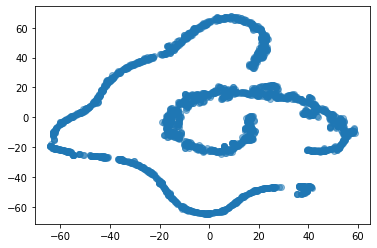

In [565]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

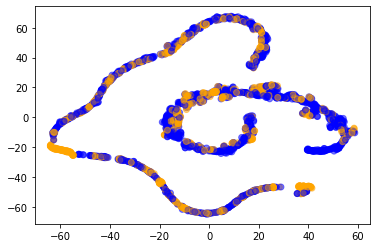

In [566]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=data_all_labeled['label'].map({0: 'blue', 1: 'orange'}), alpha=.5);

## FEATURE SELECTION

In [567]:
X = data_all_labeled.drop(['printabledist', 'size_bins',
       'vsize_bins', 'exports_general_bins', 'imports_bins', 'numstrings_bins',
       'avlength_bins','sha256', 'md5', 'appeared', 'avclass', 'histogram',
       'byteentropy', 'header', 'section', 'imports', 'exports',
       'datadirectories'], axis=1)

X.sample(2)

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
1695,0,9.67,10.62,0,0,1,1,1,0,0,0,4.73,1.27,1257,657.85,-0.00,0,0,0.57
1491,0,10.72,10.96,0,0,1,1,1,0,0,0,5.86,1.21,1774,987.82,-0.00,0,0,0.57


In [568]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            2482 non-null   int64  
 1   size             2482 non-null   float64
 2   vsize            2482 non-null   float64
 3   has_debug        2482 non-null   int64  
 4   exports_general  2482 non-null   int64  
 5   imports_general  2482 non-null   int64  
 6   has_relocations  2482 non-null   int64  
 7   has_resources    2482 non-null   int64  
 8   has_signature    2482 non-null   int64  
 9   has_tls          2482 non-null   int64  
 10  symbols          2482 non-null   int64  
 11  numstrings       2482 non-null   float64
 12  avlength         2482 non-null   float64
 13  printables       2482 non-null   int64  
 14  entropy          2482 non-null   float64
 15  paths            2482 non-null   float64
 16  urls             2482 non-null   int64  
 17  registry      

Constant features - are those that show the same value, just one value, for all the observations of the dataset. This is, the same value for all the rows of the dataset. These features provide no information that allows a machine learning model to discriminate or predict a target.

In [569]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X)
sum(sel.get_support())

19

In [570]:
print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

0


[]

Nothing to remove

Quasi-constant features - are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to discriminate or predict a target.

In [571]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X)
sum(sel.get_support())

18

In [572]:
print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

1


['avlength']

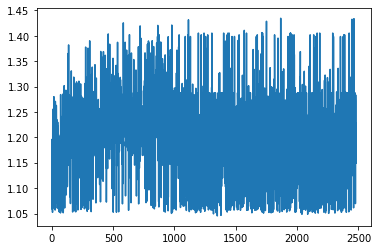

In [573]:
plt.plot(X.avlength)

Duplicated features- identifying and removing duplicated, and therefore redundant features, is an first step towards feature selection

In [574]:
X.duplicated().sum()

16

In [575]:
X[X.duplicated()]

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
676,0,8.32,9.42,0,0,0,1,1,0,0,0,1.70,1.22,57,367.64,-0.00,0,0,0.57
733,0,8.32,9.42,0,0,0,1,1,0,0,0,1.70,1.22,57,367.64,-0.00,0,0,0.57
778,0,7.62,9.01,0,0,0,0,1,0,0,0,1.70,1.35,234,221.06,-0.00,0,0,0.57
1017,0,11.03,11.41,0,0,3,0,1,0,0,0,6.25,1.15,1562,1164.91,-0.00,0,0,0.57
1178,0,11.03,11.41,0,0,3,0,1,0,0,0,6.25,1.15,1562,1164.91,-0.00,0,0,0.57
1260,1,12.29,12.41,0,0,1,1,1,0,0,0,9.69,1.23,23525,1144.23,-0.00,0,0,1.20
1395,0,12.94,13.15,1,0,373,0,1,1,0,0,9.70,1.22,23449,1019.41,-0.00,8,0,0.95
1452,1,11.93,12.85,0,0,121,0,1,0,0,0,8.36,1.33,29210,702.94,-0.00,0,0,0.95
1599,0,13.73,11.15,1,0,84,1,1,0,0,0,11.43,1.08,28197,1518.85,-0.00,0,0,1.39
1677,0,8.80,10.40,0,0,1,1,1,0,0,0,4.73,1.27,1223,645.55,-0.00,0,0,0.57


In [576]:
corrmat = X.corr()

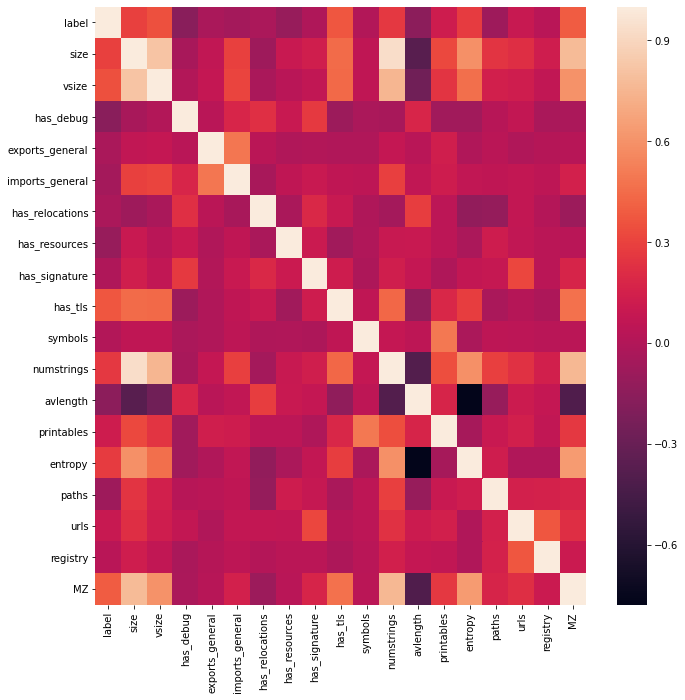

In [577]:
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [578]:
corr_matrix = X.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [579]:
high_corr_var

[('size', 'vsize'), ('size', 'numstrings')]

In [580]:
corr_matrix

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
label,1.00,0.30,0.35,0.16,0.03,0.05,0.02,0.11,0.01,0.37,0.00,0.26,0.15,0.12,0.27,0.08,0.09,0.03,0.39
size,0.30,1.00,0.81,0.04,0.07,0.30,0.08,0.10,0.14,0.45,0.06,0.93,0.37,0.32,0.59,0.25,0.22,0.13,0.78
vsize,0.35,0.81,1.00,0.00,0.08,0.31,0.03,0.03,0.07,0.44,0.06,0.76,0.27,0.24,0.46,0.14,0.13,0.07,0.60
has_debug,0.16,0.04,0.00,1.00,0.03,0.17,0.23,0.10,0.27,0.08,0.02,0.04,0.18,0.07,0.07,0.03,0.07,0.03,0.02
exports_general,0.03,0.07,0.08,0.03,1.00,0.49,0.04,0.01,0.00,0.01,0.00,0.08,0.03,0.13,0.00,0.04,0.00,0.02,0.03
imports_general,0.05,0.30,0.31,0.17,0.49,1.00,0.04,0.06,0.10,0.06,0.05,0.29,0.07,0.12,0.06,0.06,0.07,0.05,0.15
has_relocations,0.02,0.08,0.03,0.23,0.04,0.04,1.00,0.03,0.19,0.09,0.01,0.05,0.28,0.05,0.13,0.11,0.07,0.01,0.09
has_resources,0.11,0.10,0.03,0.10,0.01,0.06,0.03,1.00,0.10,0.07,0.01,0.09,0.10,0.05,0.02,0.12,0.07,0.04,0.03
has_signature,0.01,0.14,0.07,0.27,0.00,0.10,0.19,0.10,1.00,0.12,0.02,0.13,0.08,0.01,0.07,0.08,0.32,0.04,0.17
has_tls,0.37,0.45,0.44,0.08,0.01,0.06,0.09,0.07,0.12,1.00,0.06,0.44,0.14,0.18,0.28,0.03,0.02,0.02,0.47


5. Information gain - measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

In [581]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [582]:
mi = mutual_info_classif(X.drop('label', axis=1), X['label'])
mi

array([0.17436309, 0.15254413, 0.00334137, 0.04301727, 0.18269797,
       0.        , 0.01942954, 0.        , 0.05805855, 0.        ,
       0.15169849, 0.14582522, 0.14573776, 0.13704931, 0.01161339,
       0.07447623, 0.01811978, 0.11342001])

In [583]:
mi = pd.Series(mi)
mi.index = X.drop('label', axis=1).columns
mi.sort_values(ascending=False)

imports_general   0.18
size              0.17
vsize             0.15
numstrings        0.15
avlength          0.15
printables        0.15
entropy           0.14
MZ                0.11
urls              0.07
has_tls           0.06
exports_general   0.04
has_resources     0.02
registry          0.02
paths             0.01
has_debug         0.00
symbols           0.00
has_signature     0.00
has_relocations   0.00
dtype: float64

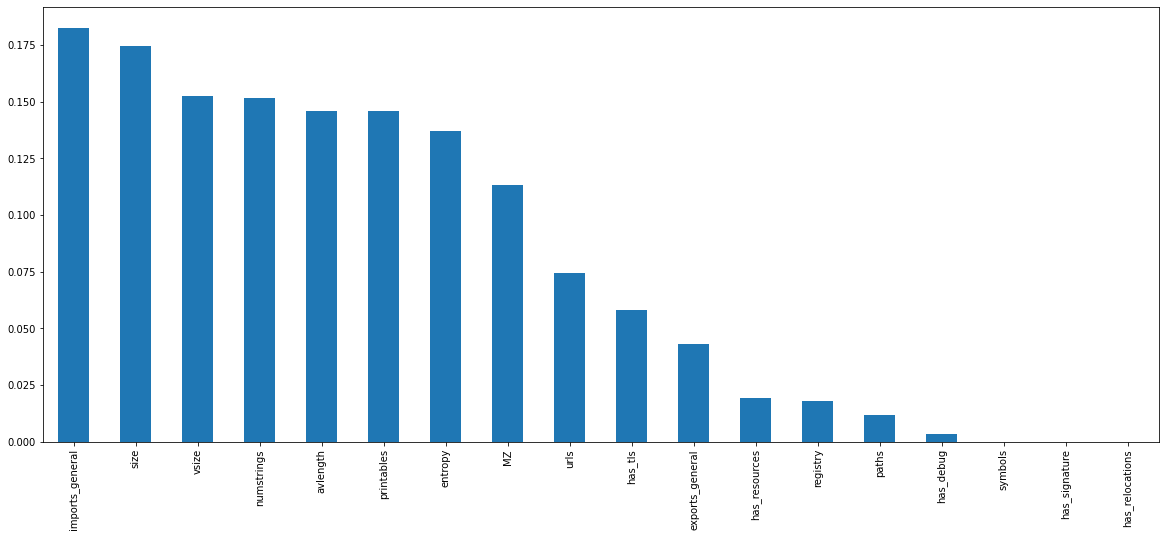

In [584]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [585]:
sel_ = SelectKBest(mutual_info_classif, k=6).fit(X.drop('label', axis=1), X['label'])
X.drop('label', axis=1).columns[sel_.get_support()]

Index(['size', 'vsize', 'imports_general', 'numstrings', 'avlength',
       'printables'],
      dtype='object')

In [586]:
data_all_labeled['label']

0       0
1       0
2       0
3       0
4       0
       ..
2477    1
2478    0
2479    1
2480    1
2481    1
Name: label, Length: 2482, dtype: int64

In [587]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [588]:
data_to= data_all_labeled.drop(['printabledist', 'size_bins',
       'vsize_bins', 'exports_general_bins', 'imports_bins', 'numstrings_bins',
       'avlength_bins','sha256', 'md5', 'appeared', 'avclass', 'histogram',
       'byteentropy', 'header', 'section', 'imports', 'exports',
       'datadirectories'], axis=1)

In [589]:
y=data_to['label']

In [590]:
X=data_to.drop('label', axis=1)

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5)

In [592]:
y_train = y_train.values.reshape(-1,1);

In [593]:
clf = LogisticRegression.fit(X_train, y_train())

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
X_train.shape, y_train.shape